Pre-Requisites:

- pystan
- prophet

In [ ]:
pip install pystan

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
pip install prophet

In [1]:
from prophet import Prophet
import numpy as np
import pandas as pd
from sklearn.metrics import mean_squared_error

C:\Users\madhu\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
df = pd.read_csv(r'E:\Courses\Data Science\Data\7 - Time Series Forecasting\3 - Facebook Prophet\AirPassengers.csv')
df.head(5)
df = df.rename(columns={'#Passengers': 'y', 'Month':'ds'})

In [4]:
df.tail(5)

,ds,y
139,1960-08,606
140,1960-09,508
141,1960-10,461
142,1960-11,390
143,1960-12,432


In [5]:
df['y_orig'] = df['y']
print(df.head(5))

        ds    y  y_orig
0  1949-01  112     112
1  1949-02  118     118
2  1949-03  132     132
3  1949-04  129     129
4  1949-05  121     121


In [6]:
# to save a copy of the original data..you'll see why shortly.
df['y'] = np.log(df['y'])

In [7]:
df.head(5)

,ds,y,y_orig
0,1949-01,4.718499,112
1,1949-02,4.770685,118
2,1949-03,4.882802,132
3,1949-04,4.859812,129
4,1949-05,4.795791,121


In [8]:
model = Prophet() #instantiate Prophet
model.add_country_holidays(country_name='US')
model.fit(df)

#train_test_split: df: train/test, then run the code for train, compare the prediction vs test

21:02:16 - cmdstanpy - INFO - Chain [1] start processing
21:02:16 - cmdstanpy - INFO - Chain [1] done processing


In [9]:
'''     'year': 'A',
        'quarter': 'Q',
        'month': 'M',
        'day': 'D',
        'hour': 'H',
        'minute': 'T',
        'second': 'S',
        'millisecond': 'L',
        'microsecond': 'U',
        'nanosecond': 'N'}
'''
#future_data = model.make_future_dataframe(periods=6, freq = 'H')
future_data = model.make_future_dataframe(periods=12, freq = 'M')

E:\Courses\Data Science\.venv\Lib\site-packages\prophet\forecaster.py:1872: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(


In [10]:
forecast_data = model.predict(future_data)

In [11]:
forecast_data.tail(5)

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,Armistice Day,Armistice Day_lower,Armistice Day_upper,Christmas Day,...,holidays,holidays_lower,holidays_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
151,1961-07-31,6.274610,6.438949,6.532720,6.262989,6.288346,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.209377,0.209377,0.209377,0.0,0.0,0.0,6.483987
152,1961-08-31,6.283633,6.311146,6.413253,6.268717,6.300338,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.077400,0.077400,0.077400,0.0,0.0,0.0,6.361033
153,1961-09-30,6.292364,6.152668,6.252936,6.274784,6.312233,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,-0.087349,-0.087349,-0.087349,0.0,0.0,0.0,6.205015
154,1961-10-31,6.301386,6.020013,6.119897,6.279796,6.324551,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,-0.231086,-0.231086,-0.231086,0.0,0.0,0.0,6.070300
155,1961-11-30,6.310117,6.157506,6.262495,6.284356,6.337103,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,-0.099021,-0.099021,-0.099021,0.0,0.0,0.0,6.211095


In [12]:

forecast_data[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(5)

,ds,yhat,yhat_lower,yhat_upper
151,1961-07-31,6.483987,6.438949,6.532720
152,1961-08-31,6.361033,6.311146,6.413253
153,1961-09-30,6.205015,6.152668,6.252936
154,1961-10-31,6.070300,6.020013,6.119897
155,1961-11-30,6.211095,6.157506,6.262495


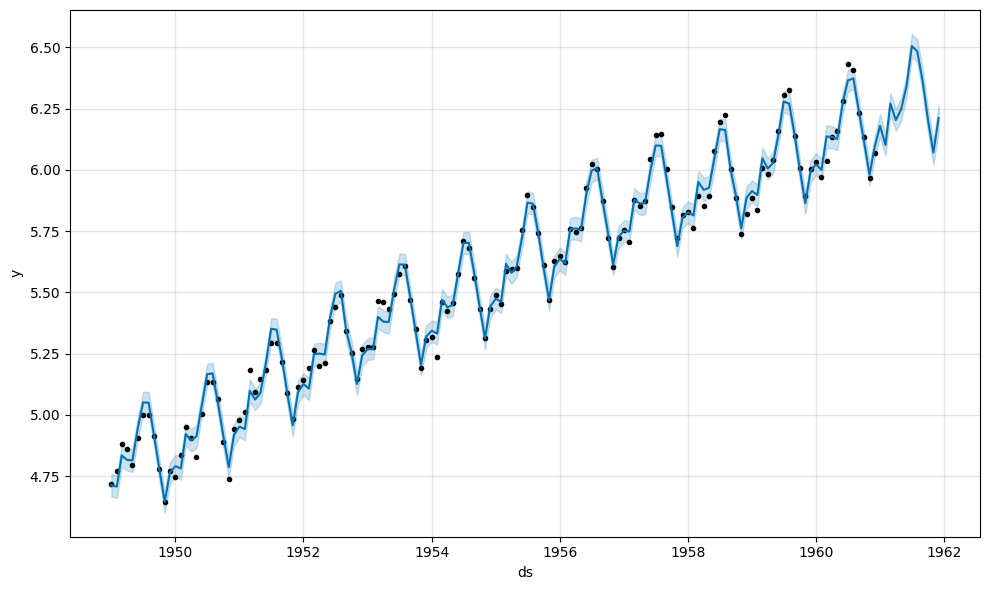

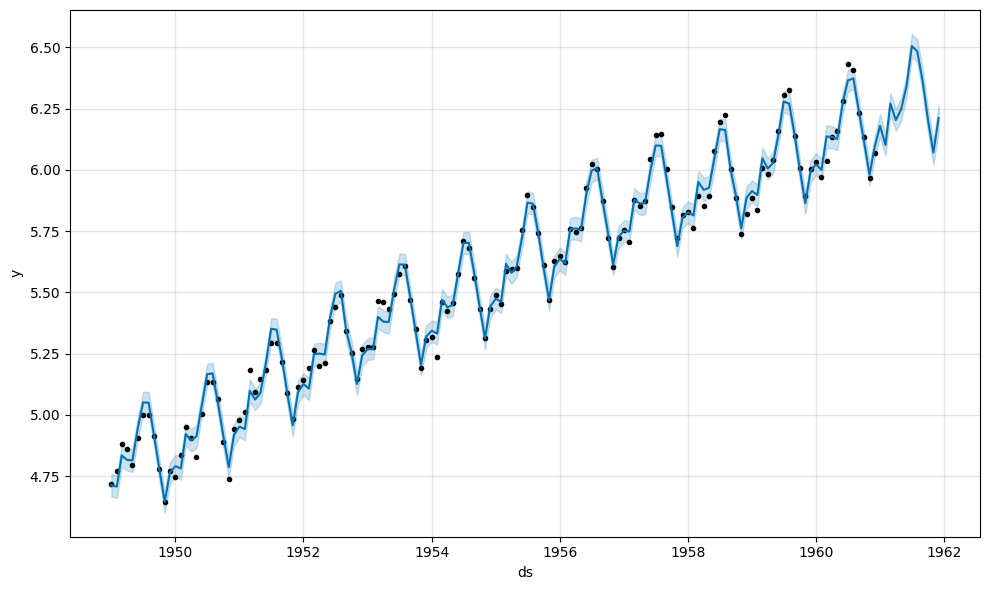

In [13]:
model.plot(forecast_data)

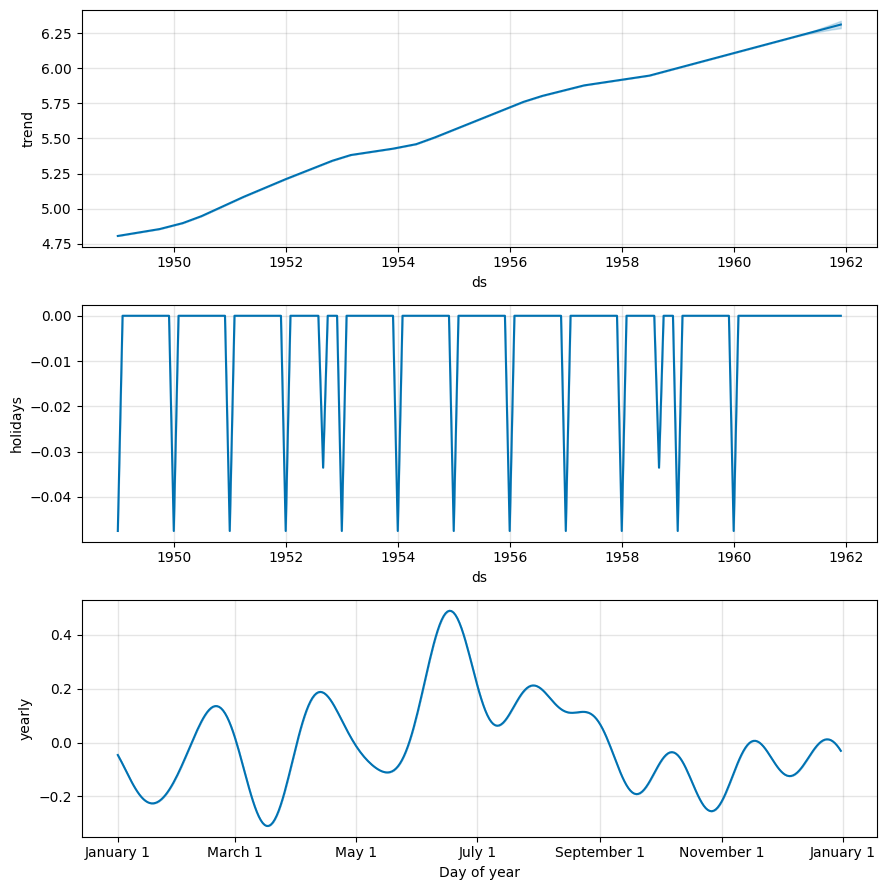

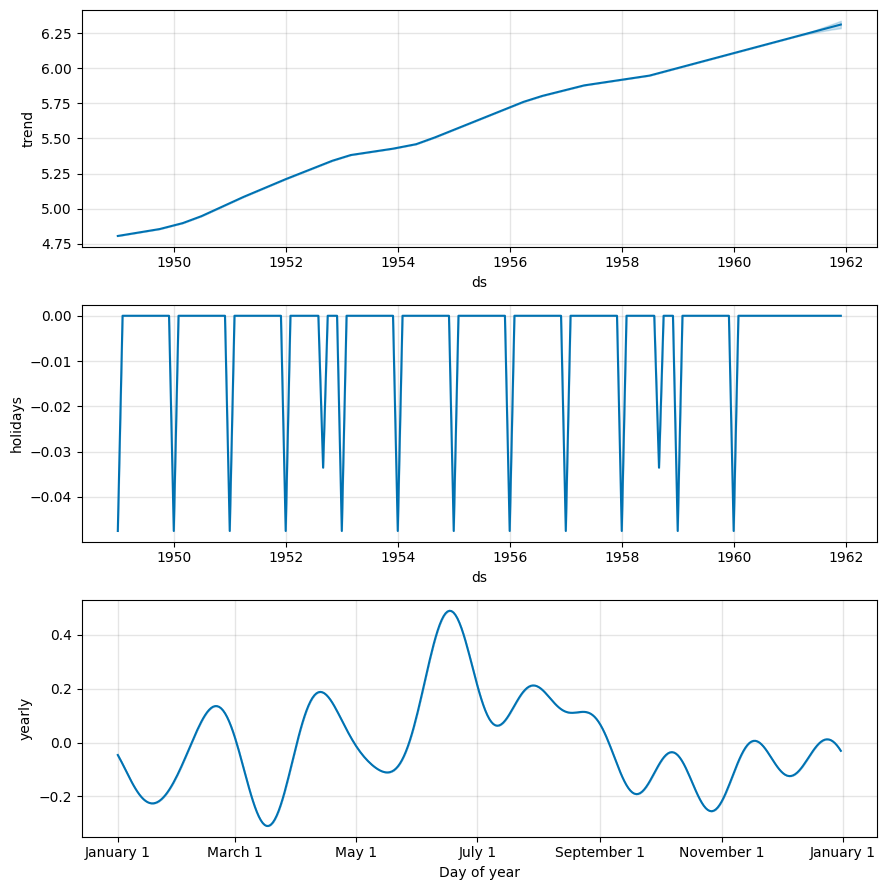

In [14]:
model.plot_components(forecast_data)

In [15]:
forecast_data_orig = forecast_data # make sure we save the original forecast data
forecast_data_orig['yhat'] = np.exp(forecast_data_orig['yhat'])
forecast_data_orig['yhat_lower'] = np.exp(forecast_data_orig['yhat_lower'])
forecast_data_orig['yhat_upper'] = np.exp(forecast_data_orig['yhat_upper'])

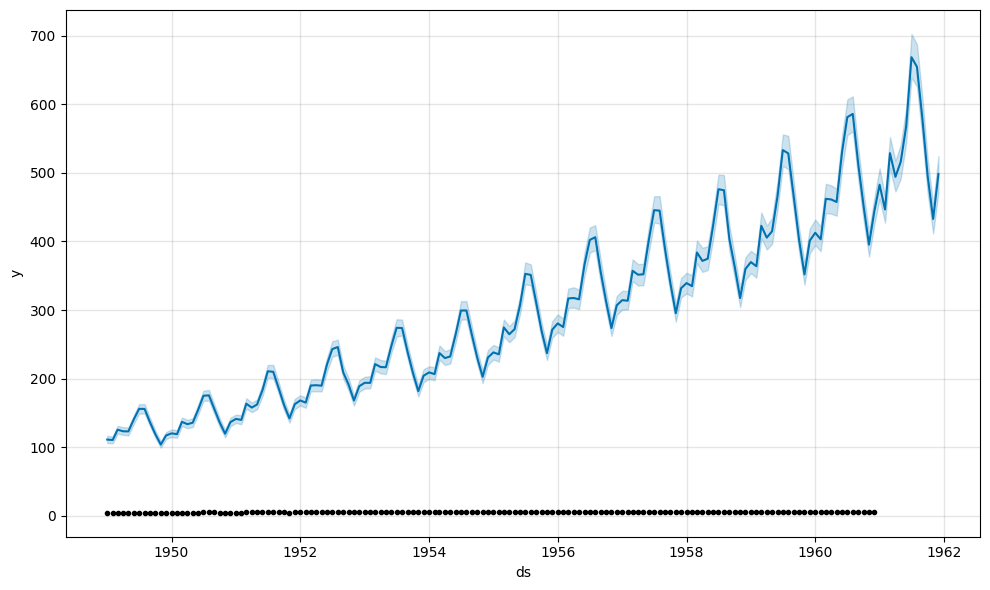

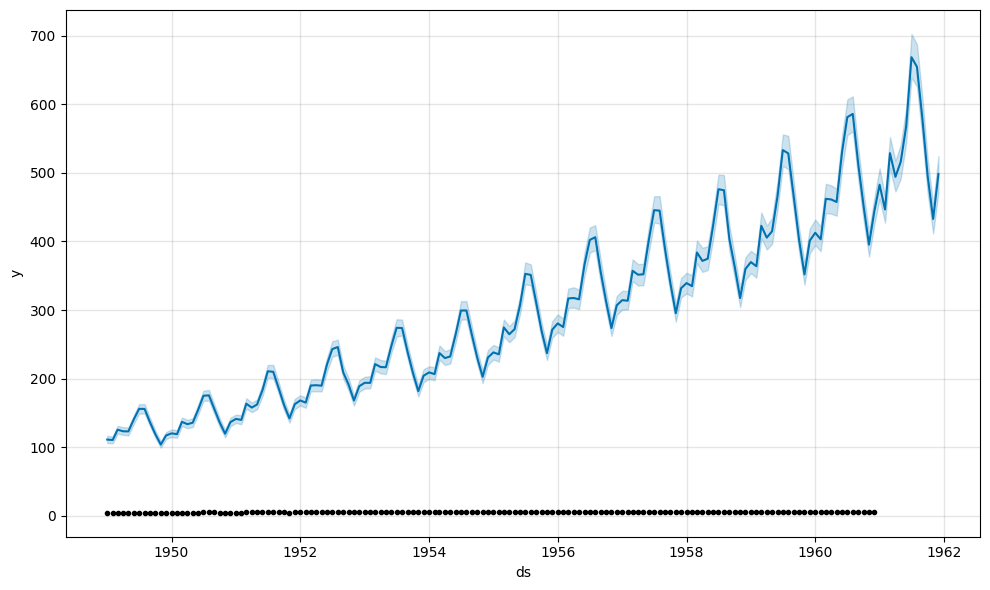

In [16]:
model.plot(forecast_data_orig)

In [17]:
df['y_log']=df['y'] #copy the log-transformed data to another column
df['y']=df['y_orig']

In [18]:
final_df = pd.DataFrame(forecast_data_orig)

In [19]:
import plotly.graph_objs as go
import plotly.offline as py

In [20]:
#Plot predicted and actual line graph with X=dates, Y=Outbound
actual_chart = go.Scatter(y=df["y_orig"], name= 'Actual')
predict_chart = go.Scatter(y=final_df["yhat"], name= 'Predicted')
predict_chart_upper = go.Scatter(y=final_df["yhat_upper"], name= 'Predicted Upper')
predict_chart_lower = go.Scatter(y=final_df["yhat_lower"], name= 'Predicted Lower')
py.plot([actual_chart, predict_chart, predict_chart_upper, predict_chart_lower], image_width=400, image_height=400)
#py.plot([actual_chart, predict_chart, predict_chart_upper, predict_chart_lower], filename = 'templates/' +'filename.html', auto_open=False)

'temp-plot.html'

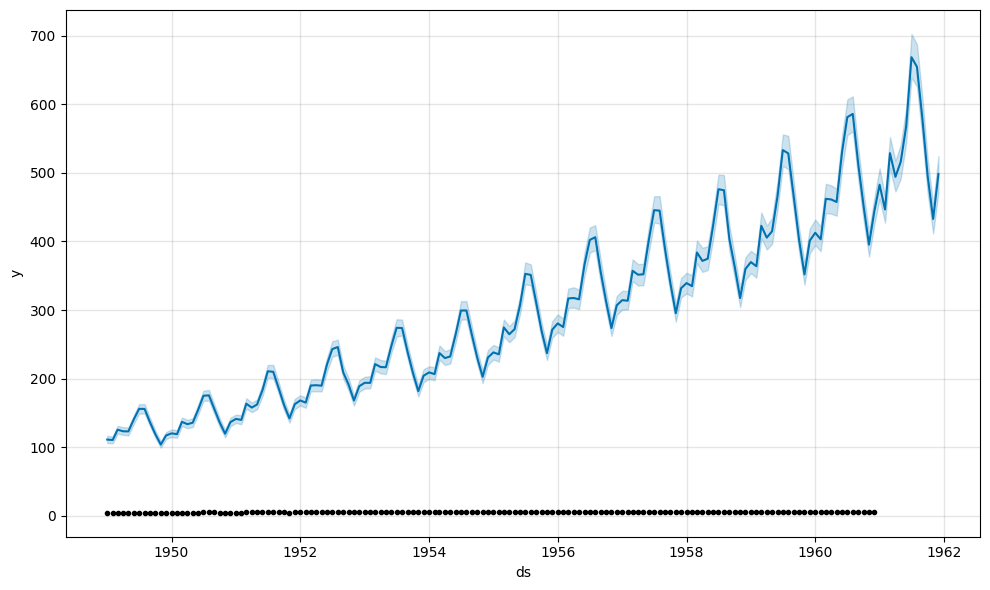

In [21]:
fig = model.plot(forecast_data)
fig.savefig('forecast.png')